In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np

from art.attacks.evasion import DecisionTreeAttack
from art.estimators.classification import SklearnClassifier

[0 1 2 3 4 5 6 7 8 9 0 1 2 3]


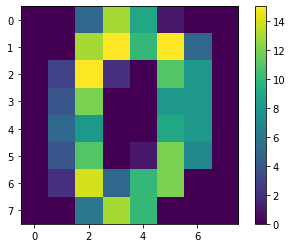

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

clf = DecisionTreeClassifier()
clf.fit(X,y)
clf_art = SklearnClassifier(clf)
print(clf.predict(X[:14]))
plt.imshow(X[0].reshape(8,8))
plt.colorbar()

Decision tree attack:   0%|          | 0/14 [00:00<?, ?it/s]

[4 4 4 6 6 4 1 2 4 4 4 4 6 4]


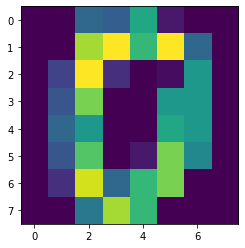

In [6]:
attack = DecisionTreeAttack(clf_art)
adv = attack.generate(X[:14])
print(clf.predict(adv))
plt.imshow(adv[0].reshape(8,8))
#plt.imshow((X[0]-adv[0]).reshape(8,8))  ##use this to plot the difference

Decision tree attack:   0%|          | 0/14 [00:00<?, ?it/s]

[6 6 7 7 8 8 9 9 1 1 2 2 3 3]


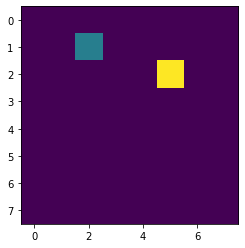

In [8]:
adv = attack.generate(X[:14],np.array([6,6,7,7,8,8,9,9,1,1,2,2,3,3]))
print(clf.predict(adv))
#plt.imshow(adv[0].reshape(8,8))
plt.imshow((X[0]-adv[0]).reshape(8,8))

Decision tree attack:   0%|          | 0/14 [00:00<?, ?it/s]

[4 4 4 6 6 4 1 2 4 4 4 4 6 4]


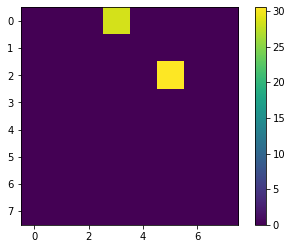

In [10]:
attack = DecisionTreeAttack(clf_art,offset=20.0)
adv = attack.generate(X[:14])
print(clf.predict(adv))
#plt.imshow(adv[0].reshape(8,8))
plt.imshow((X[0]-adv[0]).reshape(8,8))
plt.colorbar()